## Audio Preprocessing
Reference material: https://towardsdatascience.com/sound-event-classification-using-machine-learning-8768092beafc

In [17]:
import os
import sys
import numpy as np
import matplotlib.pyplot as plt

from scipy.io import wavfile as wav

In [2]:
####### Load all features and wav files #######
import dataloader
all_data_features, all_labels, all_files, one_file = dataloader.main()

Using TensorFlow backend.


In [37]:
####### HELPER FUNCTIONS (Table of Content) #######
def display_wav(np_array):
    #librosa_load, librosa_sampling_rate = librosa.load(wav_file)
    #scipy_sampling_rate, scipy_load = wav.read(wav_file)
    plt.figure(figsize=(12, 4))
    #plt.plot(scipy_load)
    plt.plot(np_array)

import wave
def plot_wav(wav_file):
    spf = wave.open(wav_file, "r")

    # Extract Raw Audio from Wav File
    signal = spf.readframes(-1)
    signal = np.fromstring(signal, "Int16")

    plt.figure(1)
    plt.title("Signal Wave...")
    plt.plot(signal)
    plt.show()

Original audio file:
Noise removed audio file:


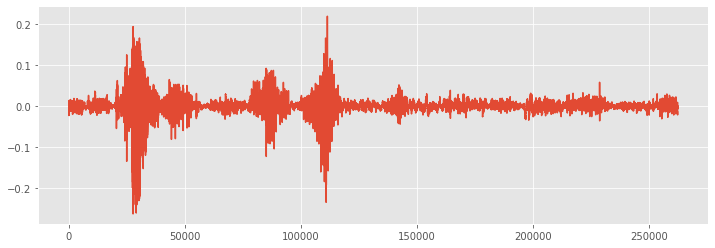

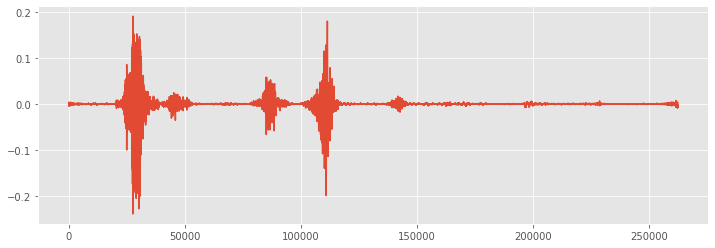

In [27]:
####### Visualize noise reduction #######
import librosa
import noisereduce as nr

# Load audio file
audio_data, sampling_rate = librosa.load(one_file)

# Noise reduction
noisy_part = audio_data[0:25000]  
reduced_noise = nr.reduce_noise(audio_clip=audio_data, noise_clip=noisy_part, verbose=False)

# Visualize
print("Original audio file:")
display_wav(audio_data)
print("Noise removed audio file:")
display_wav(reduced_noise)

Trimmed audio file:


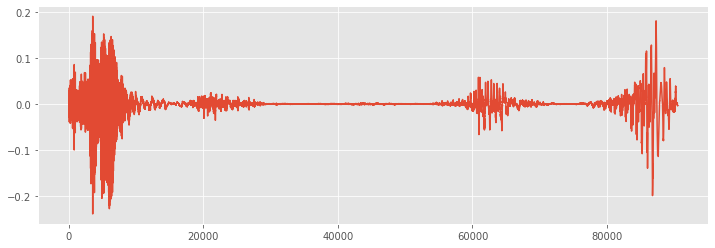

In [49]:
####### Trim unnecessary silence #######
trimmed, index = librosa.effects.trim(reduced_noise, top_db=20, frame_length=512, hop_length=64)
print("Trimmed audio file:")
display_wav(trimmed)

In [ ]:
####### Listen to original wav file #######
import IPython.display as ipd
ipd.Audio(one_file)

In [50]:
####### Listen to noised-reduced wav file #######
base, filename = os.path.split(one_file)
filename, _ = os.path.splitext(filename)
reduced_file = base + '/' + filename + '-noised-reduced.wav'
wav.write(reduced_file, sampling_rate, reduced_noise)
ipd.Audio(reduced_file)

In [ ]:
####### Listen to noised-reduced and trimmed (processed) wav file #######
base, filename = os.path.split(one_file)
filename, _ = os.path.splitext(filename)
reduced_file = base + '/' + filename + '-processed.wav'
wav.write(reduced_file, sampling_rate, reduced_noise)
ipd.Audio(reduced_file)